<a href="https://colab.research.google.com/github/wViniciusLuzw/logicaprogramacaopython/blob/main/C%C3%B3pia_de_Aluguel_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula Introdutória de Análise de Dados**

**Objetivo:**

Nesta aula, você aprenderá o processo de análise de dados utilizando ferramentas como o Google Colab e bases de dados do Kaggle.

# **Principais Passos para Análise de Dados:**
1. **Definição do Problema:**
- Qual a questão a ser resolvida? O que esperamos descobrir com a análise?
2. **Coleta de Dados:**
- Obtenção de dados de fontes como APIs, arquivos CSV, ou sites como o Kaggle.
3. **Exploração de Dados:**
- Inspeção dos dados: tipos de dados, presença de valores ausentes, outliers, e estatísticas descritivas básicas.
4. **Limpeza de Dados:**
- Tratamento de dados faltantes, remoção de duplicatas e correção de inconsistências.
5. **Visualização de Dados:**
- Criação de gráficos para identificar padrões, tendências e correlações entre variáveis.
6. **Conclusão e Comunicação:**
- Interpretação dos resultados, criação de relatórios e apresentação de insights.

# **Fontes de Dados Utilizadas:**
Para esta aula, utilizaremos:
- Base de Dados de Aluguel de Bicicletas: [Link no Kaggle](https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset)



---



# **Conhecendo a Base de Dados**

Antes de mais nada, vamos fazer a importação de algumas bibliotecas para as análises dos dados. Estas bibliotecas são comuns na maioria das análises. Caso precise de alguma biblioteca adicional, a mesma pode ser importada nas células abaixo.

In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd #Importar e manipular base de dados e fazer pequenas analises

import matplotlib.pyplot as plt # Plotar gráficos na tela
import seaborn as sns # Plotar gráficos na tela

In [ ]:
# CARREGAR OS DADOS
df = pd.read_csv("https://raw.githubusercontent.com/cintiapinho/analisedadospython/refs/heads/main/aluguelbikes/bikes_day.csv")
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Colunas e significados do dataset:

- **instant**: Registro do indice
- **dteday**: Data
- **season**: Estação do ano (1:primavera, 2:verão, 3:outono, 4:inverno)
- **yr**: Ano (0: 2011, 1:2012)
- **mnth**: Mês (1 a 12)
- **hr**: Horas (0 a 23)
- **holiday**: Feriado ou Não
- **weekday**: Dia da Semana (0 = segunda-feira, 1 = terça-feira, 2 = quarta-feira, 3 = quinta-feira, 4 = sexta-feira, 5 = sábado, 6 = domingo)
- **workingday**: Se o dia não for fim de semana nem feriado será 1, caso contrário será 0.
- **weathersit**: (extraído do Freemeteo)
  - **1**: Claro, Poucas nuvens, Parcialmente nublado, Parcialmente nublado
  - **2**: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Poucas nuvens, Névoa
  - **3**: Neve fraca, Chuva fraca + Trovoada + Nuvens dispersas, Chuva fraca + Nuvens dispersas
  - **4**: Chuva Forte + Paletes de Gelo + Trovoada + Névoa, Neve + Nevoeiro
- **temp**: Temperatura normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (somente na escala horária)
- **atemp**: Temperatura de sensação normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (somente em escala horária)
- **hum**: Umidade normalizada. Os valores são divididos por 100 (máx.)
- **windspeed**: Velocidade do vento normalizada. Os valores são divididos por 67 (máx.)
- **casual**: contagem de usuários casuais
- **registered**: contagem de usuários registrados
- **cnt**: contagem do total de bicicletas alugadas, incluindo casuais e registradas



---



# **1. Definição do Problema:**
Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

  1. *Como a temperatura influencia o número de bicicletas alugadas ao longo do ano?*
  2. *A estação do ano influencia no número de bicicletas alugadas?*
  3. *Quais são os dias da semana com maior número de aluguéis?*

A análise tem o objetivo de identificar padrões no aluguel de bicicletas com base em variáveis como temperatura, hora do dia e dia da semana. Esperamos descobrir correlações e padrões sazonais ou comportamentais.

# **2 - Coleta de Dados:**
**Fonte de Dados:** A base de dados utilizada é do Kaggle, chamada `Bike Sharing Dataset`. O dataset contém informações sobre o número de bicicletas alugadas em diferentes horários e condições meteorológicas.

***Já foi feita nos ítens anteriores!***

# **3 - Exploração de Dados:**

Neste passo, inspecionamos a estrutura dos dados, verificamos a presença de valores faltantes e geramos estatísticas descritivas.

In [ ]:
# Verificando valores faltantes
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Exibindo informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Estatísticas descritivas
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> *Essa exploração inicial nos permite entender melhor os dados e preparar o terreno para os próximos passos.*
😊


# **4 - Limpeza de Dados:**

Limpeza de Dados é o processo de preparar os dados brutos para análise, garantindo que estejam consistentes, corretos e livres de erros. Isso inclui:

- **Tratamento de valores faltantes:** Preenchendo ou removendo valores ausentes.
Remoção de duplicatas: Eliminando dados duplicados que podem distorcer a análise.
- **Correção de inconsistências:** Ajustando formatos incorretos ou padrões de dados que não seguem uma estrutura definida (como datas ou categorias).
- **Transformações necessárias:** Criando novas colunas a partir de dados existentes para facilitar a análise, como extrair hora e dia da semana a partir de uma data.
Esses passos garantem que a análise seja precisa e confiável.

# **5 - Visualização de Dados:**
Vamos agora criar gráficos para responder às perguntas formuladas na fase de Definição do Problema.

**Pergunta 1:** *Como a temperatura influencia o número de bicicletas alugadas?*

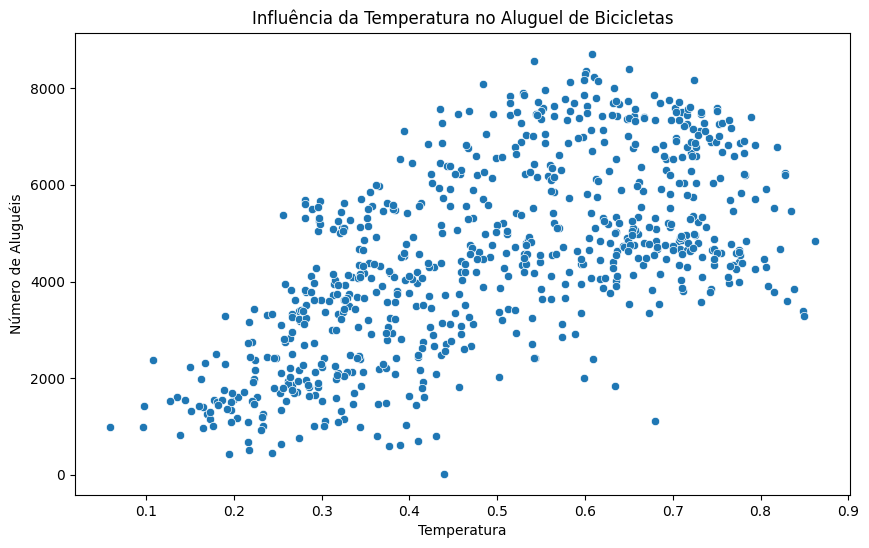

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Influência da Temperatura no Aluguel de Bicicletas')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.show()

Observe o gráfico. Nele temos uma escala de temperatura em °C normalizada. Caso deseje ver em °C você pode voltar no passo 4 e fazer a transformação.

Nesta transformação você pode criar uma nova coluna e armazenar os valores novos nela sem a perda da informação original.

Do dataset original temos que:

- **temp**: Temperatura normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (somente na escala horária)

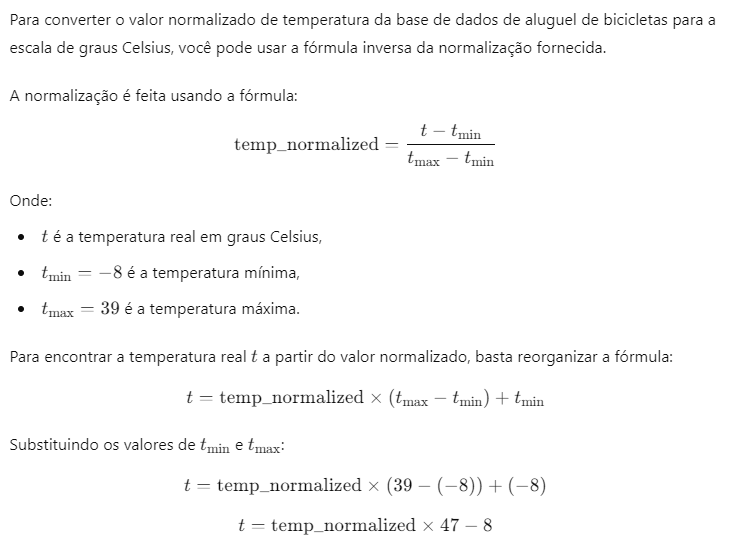

In [ ]:
df['temp-celsius'] = df['temp'] * 47 - 8 # Criação de uma coluna com o nome 'temp-celsius', a qual mostra a temperatura em Celsius de cada linha
df # Imprimindo a tabela, já com a nova coluna 'temp-celsius'

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp-celsius
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,3.945849
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,3.906651
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,3.906651
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,4.024151


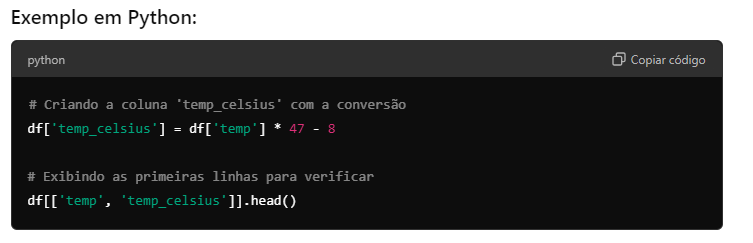

**Pergunta 2:** *A estação do ano influencia no número de bicicletas alugadas?*

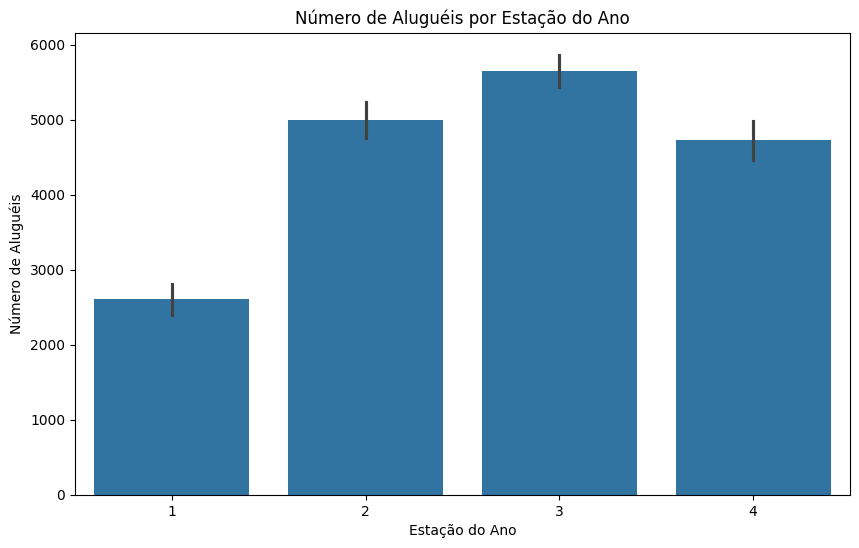

In [ ]:
# Gráfico de barras para o número de aluguéis por estação
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Número de Aluguéis por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

> **Perceba que precisamos de uma legenda para entender quais são as estações do ano. Assim fica difícil para o usuário entender o significado.**



In [ ]:
# Criando uma coluna para a estação do ano

# 1:primavera, 2:verão, 3:outono, 4:inverno

def definir_estacao(mes):
    if mes == 1:
        return 'Primavera'
    elif mes == 2:
        return 'Verão'
    elif mes == 3:
        return 'Outono'
    else:
        return 'Inverno'

df['estacao'] = df['season'].apply(definir_estacao)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp-celsius,estacao
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,Primavera
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,Primavera
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,Primavera
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,Primavera
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,Primavera


In [ ]:
df['season'].value_counts()

,count
estacao,
Outono,188
Verão,184
Primavera,181
Inverno,178


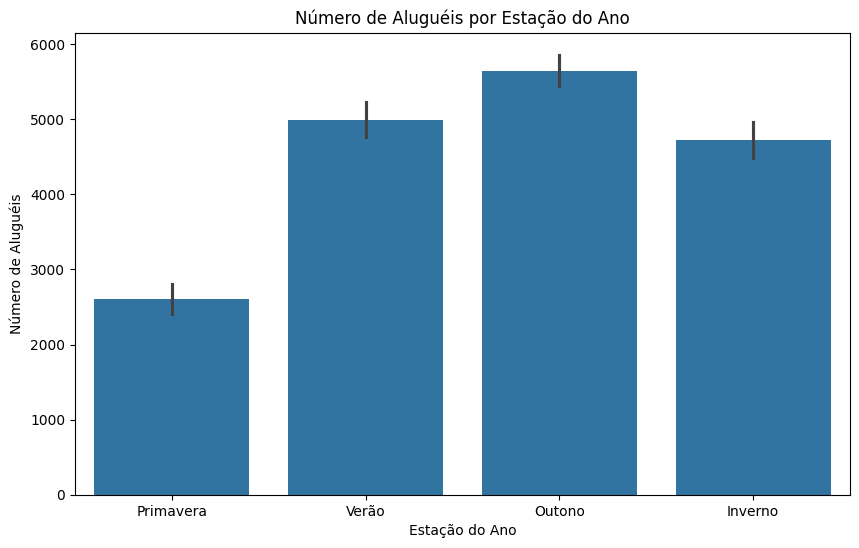

In [ ]:
# Gráfico de barras para o número de aluguéis por estação
plt.figure(figsize=(10,6))
sns.barplot(x='estacao', y='cnt', data=df)
plt.title('Número de Aluguéis por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

**Pergunta 3:** *Quais são os dias da semana com maior número de aluguéis?*

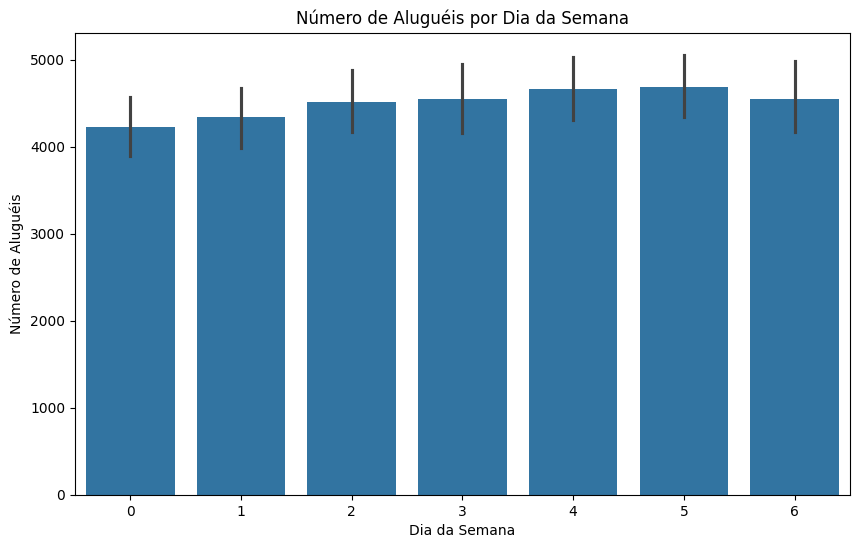

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', data=df)
plt.title('Número de Aluguéis por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Aluguéis')
plt.show()



---



In [ ]:
#weekday: Dia da Semana (0 = segunda-feira, 1 = terça-feira, 2 = quarta-feira, 3 = quinta-feira, 4 = sexta-feira, 5 = sábado, 6 = domingo)
def dia_semana(dia):
  if dia == 0:
    return "Segunda-Feira"
  elif dia == 1:
    return "Terça-Feira"
  elif dia == 2:
    return "Quarta-Feira"
  elif dia == 3:
    return "Quinta-Feira"
  elif dia == 4:
    return "Sexta-feira"
  elif dia == 5:
    return "Sábado"
  elif dia == 6:
    return "Domingo"

df['dia-semana'] = df['weekday'].apply(dia_semana)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp-celsius,estacao,dia-semana
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,Primavera,Domingo
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,Primavera,Segunda-Feira
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,Primavera,Terça-Feira
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,Primavera,Quarta-Feira
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,Primavera,Quinta-Feira


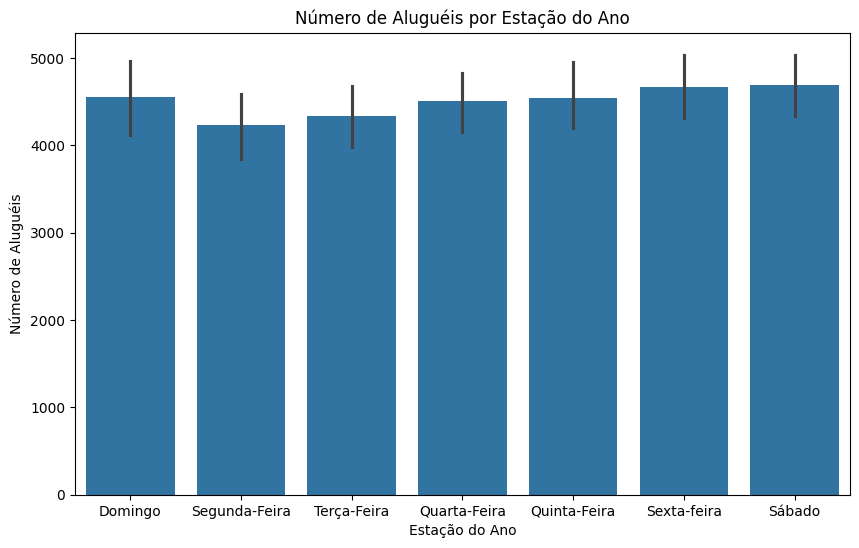

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='dia-semana', y='cnt', data=df)
plt.title('Número de Aluguéis por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

# **OUTRAS OBSERVAÇÕES**

A medida que vamos analisando a base de dados, outras perguntass podem surgir sugerindo outros tipos de observações e/ou gráficos.

**Pergunta Extra 1:** Quantidade de aluguéis por mês

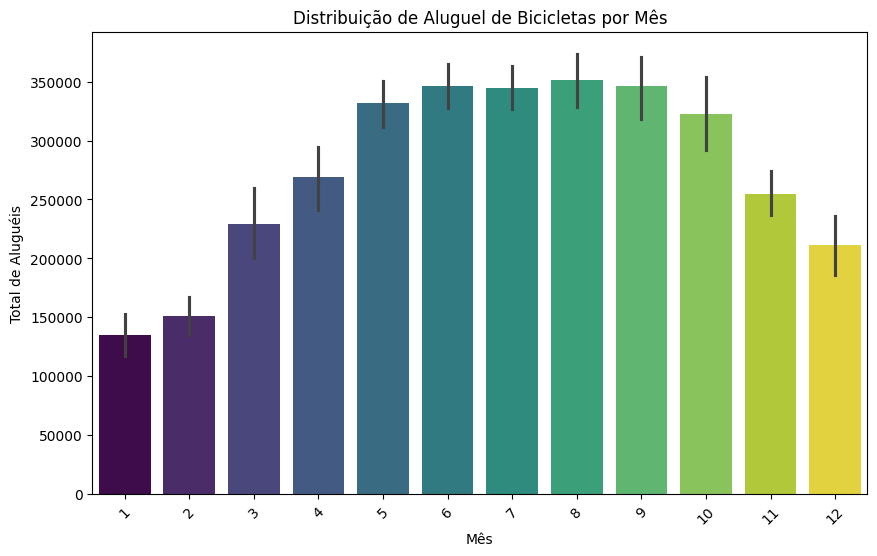

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=df, estimator=sum, hue='mnth', palette='viridis', dodge=False, legend=False)
plt.title('Distribuição de Aluguel de Bicicletas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Aluguéis')
plt.xticks(rotation=45)
plt.show()

**Pergunta Extra 2:** Quantidade de bicicletas alugadas ao longo do tempo

In [ ]:
df.head()

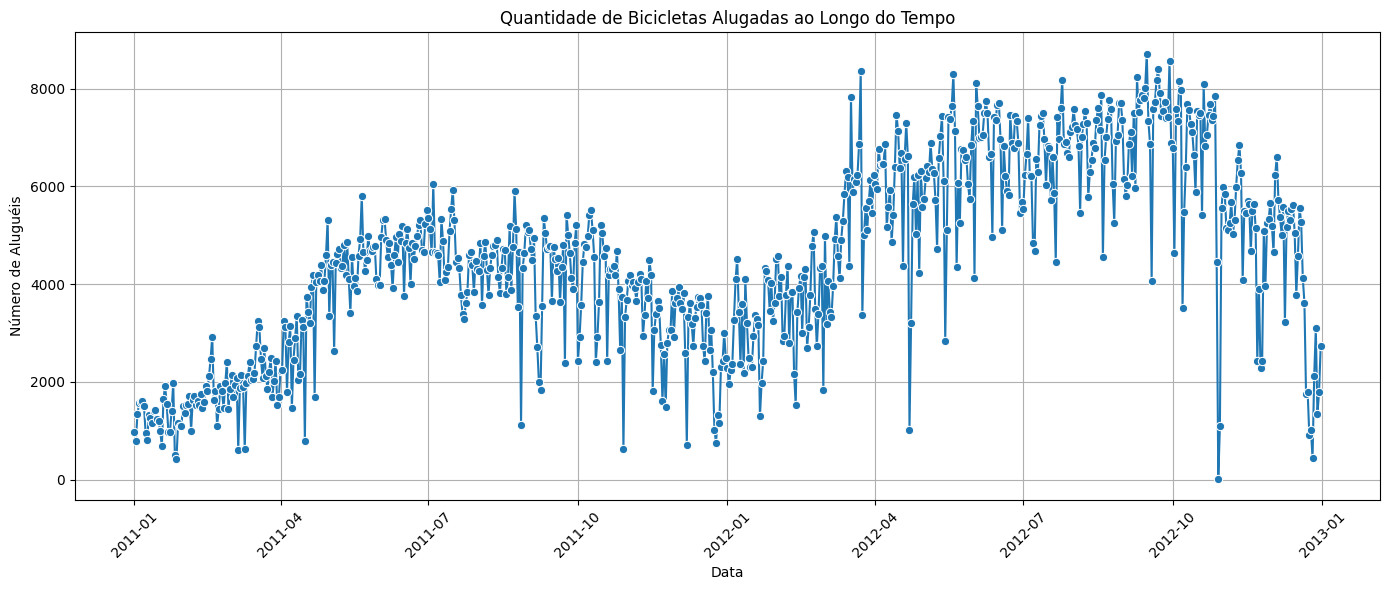

In [ ]:
# Passo 1: Garantir que a coluna 'datetime' está no formato datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Passo 2: Agrupar os dados por data e contar o número total de aluguéis
df['data'] = df['dteday'].dt.date  # Extrair a data
alugueis_por_data = df.groupby('data')['cnt'].sum().reset_index()

# Passo 3: Visualizar os resultados
plt.figure(figsize=(14, 6))
sns.lineplot(x='data', y='cnt', data=alugueis_por_data, marker='o')
plt.title('Quantidade de Bicicletas Alugadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Aluguéis')
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.grid()
plt.tight_layout()
plt.show()

**Pergunta Extra 3**: Comparar o total de bicicletas alugadas em diferentes condições climáticas

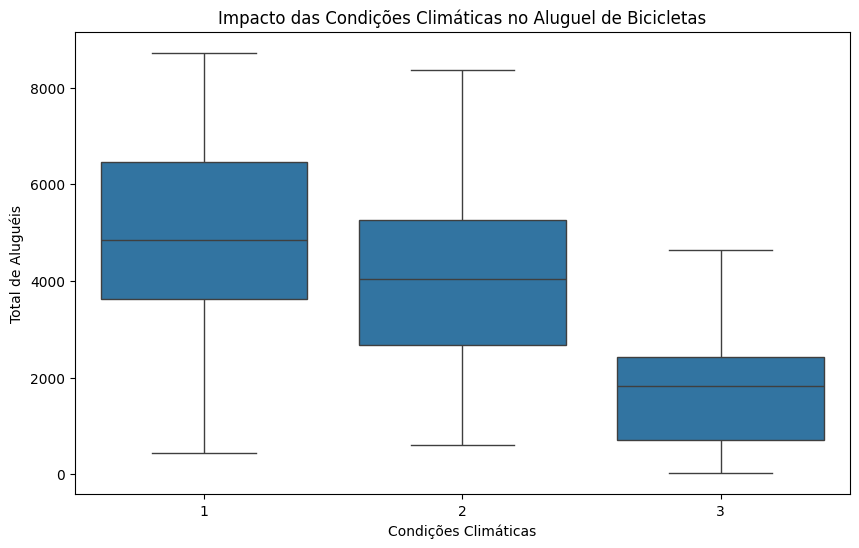

In [ ]:
# Boxplot para comparar o total de bicicletas alugadas em diferentes condições climáticas
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Impacto das Condições Climáticas no Aluguel de Bicicletas')
plt.xlabel('Condições Climáticas')
plt.ylabel('Total de Aluguéis')
plt.show()

In [ ]:
df['weathersit'].unique()

array([2, 1, 3])

**Pergunta Extra 4**: Gráfico de barras para comparar o aluguel em dias de feriado e não feriado

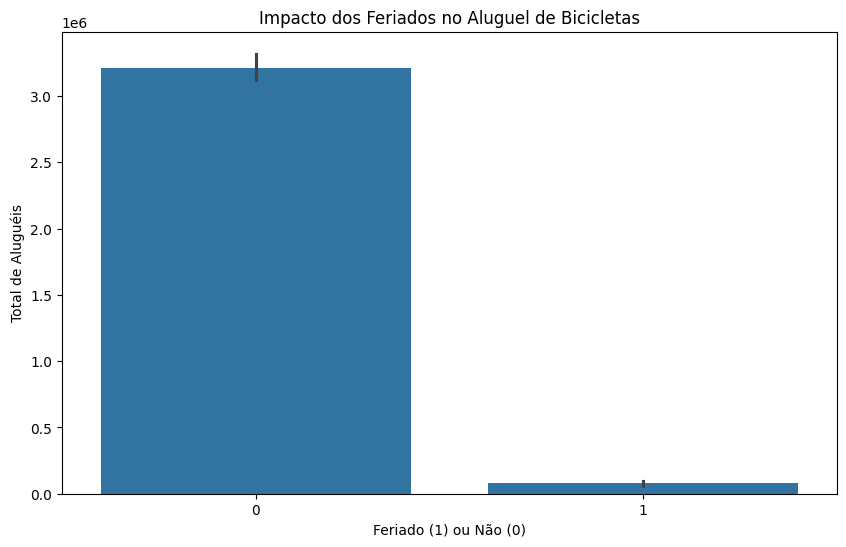

In [ ]:
# Gráfico de barras para comparar o aluguel em dias de feriado e não feriado
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=df, estimator=sum)
plt.title('Impacto dos Feriados no Aluguel de Bicicletas')
plt.xlabel('Feriado (1) ou Não (0)')
plt.ylabel('Total de Aluguéis')
plt.show()

**Pergunta Extra 5**: Qual a quantidade de aluguéis por tipo de usuário: Registrado/Casual

<Axes: ylabel='temp'>

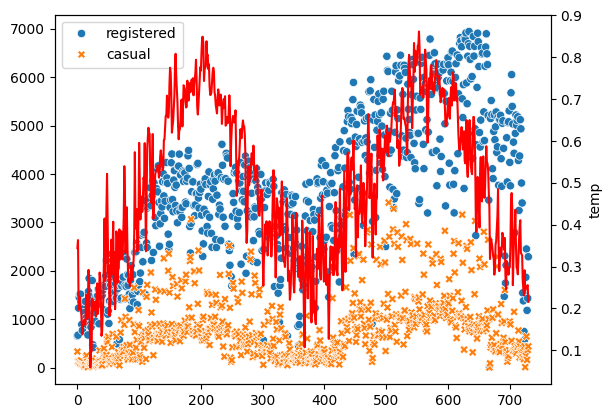

In [ ]:
sns.scatterplot(df[['registered', 'casual']])
ax2 = plt.twinx()
sns.lineplot((df.temp), color='r')

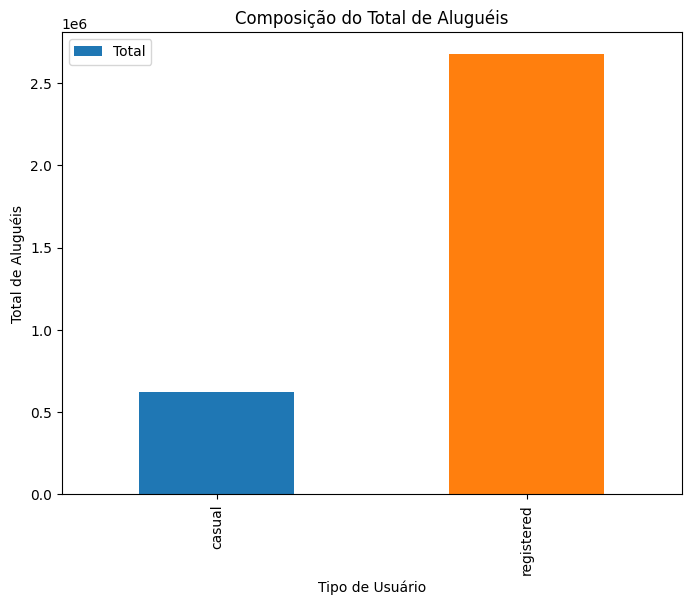

In [ ]:
# Gráfico de barras empilhadas para mostrar a proporção de usuários casuais e registrados
df_users = df[['casual', 'registered']].sum().reset_index()
df_users.columns = ['Tipo de Usuário','Total']
df_users.plot(kind='bar', x='Tipo de Usuário', y='Total', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Composição do Total de Aluguéis')
plt.ylabel('Total de Aluguéis')
plt.show()

[620017, 2672662]


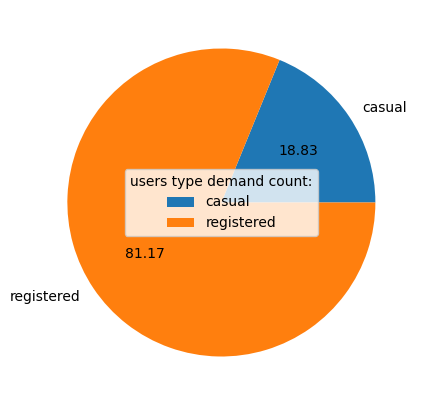

In [ ]:
plt.figure(figsize=(5,5))
c_t=df["casual"].sum()
r_t=df["registered"].sum()
l=[c_t,r_t]
print(l)
mylabels = ["casual", "registered"]
plt.pie(l,labels = mylabels,autopct ='%.2f')
plt.legend(title = "users type demand count:")
plt.show()

**Pergunta Extra 6**: Avaliar a correlação entre variáveis numéricas.

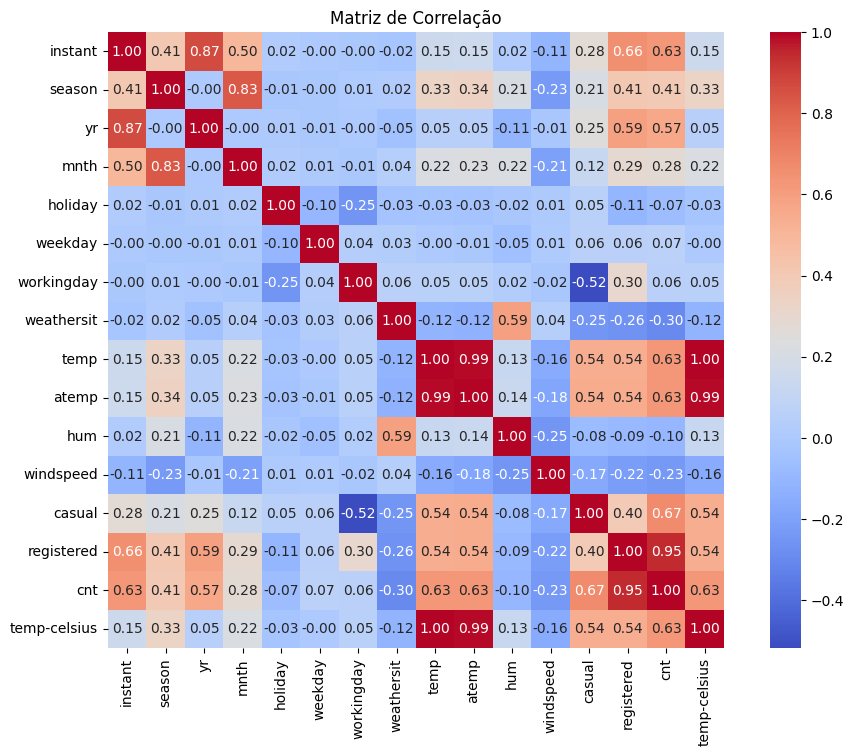

In [ ]:
# Passo 1: Calcular a matriz de correlação usando apenas colunas numéricas
correlation_matrix = df.select_dtypes(include='number').corr()

# Passo 2: Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

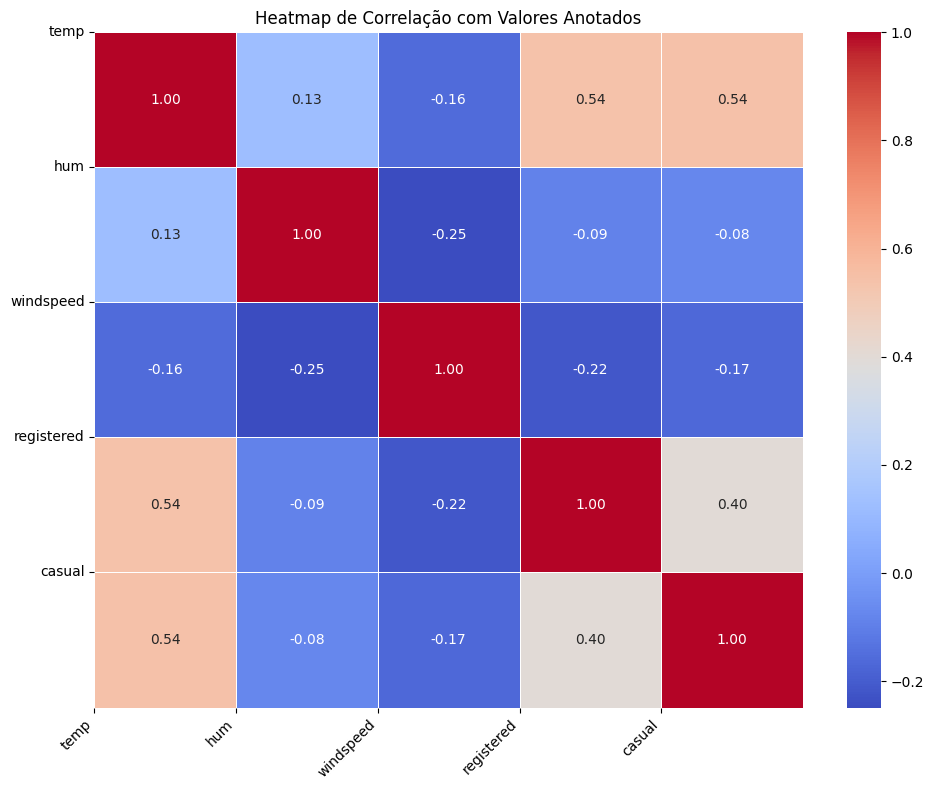

In [ ]:
# UTILIZANDO COLUNAS ESPECÍFICAS
cols = ['temp','hum', 'windspeed', 'registered', 'casual']
plot_data = df[cols]

# Calcular a correlação entre as colunas selecionadas
corr = plot_data.corr()

# Criar a figura
plt.figure(figsize=(10, 8))

# Criar o heatmap com anotações dos valores de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Configurações adicionais do gráfico
plt.xticks(range(len(plot_data.columns)), plot_data.columns, rotation=45, ha='right')
plt.yticks(range(len(plot_data.columns)), plot_data.columns, rotation=0)
plt.title('Heatmap de Correlação com Valores Anotados')
plt.tight_layout()

# Exibir o gráfico
plt.show()

# **6 - Conclusão e Comunicação:**

**Conclusão 1: Influência da Temperatura**

A partir do gráfico de dispersão, observamos que há uma correlação positiva entre a temperatura e o número de bicicletas alugadas. Quando a temperatura aumenta, o número de aluguéis também cresce. Isso sugere que, em dias mais quentes, as pessoas tendem a alugar mais bicicletas, possivelmente para lazer ou atividades ao ar livre.

Correto, entretando quando as temperaturas são muito elevadas a quantidade de alugueis diminui. Isso sugere que as pessoas preferem dias mais agradáveis para o aluguel.

**Conclusão 2: Influência da Estação do Ano**

Aqui descreva sua conclusão. Será que há algo errado com a base de dados?

> *Poderíamos ter uma conclusão como por exemplo:* O gráfico de barras mostra que o Verão apresenta o maior número de aluguéis de bicicletas, seguido pela Primavera. O Inverno tem o menor número de aluguéis, o que é esperado, pois o clima frio pode desencorajar o uso de bicicletas. O Outono também apresenta um número reduzido de aluguéis em comparação com as estações mais quentes. Isso sugere que o clima tem um impacto significativo no uso de bicicletas, com a maioria dos usuários optando por alugar durante as estações mais amenas e quentes.

O gráfico de barras mostra que o Outono, seguido pelo Verão, Inverno e Primavera com o menor número de alugueis.

**Conclusão 3: Aluguéis por Dia da Semana**

0 = segunda-feira, 1 = terça-feira, 2 = quarta-feira, 3 = quinta-feira, 4 = sexta-feira, 5 = sábado, 6 = domingo

Aqui descreva sua conclusão. Será que há algo errado com a base de dados?

> *Poderíamos ter uma conclusão como por exemplo:*O gráfico de barras revela que os dias úteis (segunda a sexta-feira) têm um número maior de aluguéis em comparação aos fins de semana. Isso sugere que a demanda por bicicletas está mais relacionada com deslocamentos durante dias úteis, enquanto no fim de semana o uso tende a cair.

O gráfico revela que oas dias que mais possuem aluguel são Sábado, Domingo e Sexta-feira, revelando que a maior parte dos consumidores alugam durante suas folgas.

**Conclusão 4: Aluguéis Casuais/Registrados

Os usúarios já registrados possuem uma maior frequência em relação aos usúarios casuais, revelando que os casuais na maioria das vezes ultilizaram apenas uma vez, talvez por diversão ou a trabalho.
Entretanto alguns usúarios casuais possuem uma alta frequência.

**Conclusão 5: Alugadas ao longo do tempo

Entre a data de 2012-10 e 2013-01 o estabelicimento obteve a maior que registrada em uma tabela, talvez algum imprevisto ou uma reforma, mas após o ocorrido o estabelecimento obteve altos rendimentos

# **Exercício**

Realizar uma análise semelhante em uma base de dados diferente disponível no Kaggle, explorando as principais variáveis e criando gráficos que ajudem a entender os padrões presentes nos dados.

Aqui estão alguns links de bases de dados no Kaggle que podem ser utilizadas para o exercício proposto:

- **Titanic - Machine Learning from Disaster (Análise de sobreviventes)**:
https://www.kaggle.com/c/titanic/data

- *House Prices - Advanced Regression Techniques (Preços de casas nos EUA)*:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- **Wine Quality Dataset (Avaliação de vinhos)**:
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

- **Global Superstore Dataset (Vendas globais de uma loja)**:
https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

- **Airbnb New York City Listings (Aluguéis de curta duração em NYC)**:
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data